# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.10.0-delta.fix.307.refactor.291'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **14th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{4: ['Holy See'],
 5: ['Fiji', 'Liechtenstein', 'Tunisia', 'Tanzania'],
 6: ['Slovenia', 'Sri Lanka', 'Brunei', 'Georgia', 'Poland', 'Slovakia',
     'Papua New Guinea', 'Czech Republic', 'Dominica'],
 7: ['Saint Lucia', 'Monaco', 'Yemen', 'Lithuania', 'Croatia', 'Myanmar',
     'Ireland', 'Grenada', 'Switzerland', 'Hungary', 'Andorra'],
 8: ['Seychelles', 'Equatorial Guinea', 'Malawi', 'Botswana', 'Spain', 'Jordan',
     'Madagascar', 'Malaysia', 'Sao Tome and Principe',
     'Saint Vincent and the Grenadines', 'Antigua and Barbuda', 'Angola',
     'Nicaragua', 'Guinea-Bissau', 'Central African Republic', 'Mongolia',
     'Cyprus'],
 9: ['Cameroon', 'Greece', 'Djibouti', 'Romania', 'Nepal', 'Iceland',
     'Portugal', 'Malta', 'Burkina Faso', 'Barbados', 'Gambia', 'Cambodia',
     'South Sudan', 'Austria', 'Kazakhstan', 'Zimbabwe', 'Jamaica', 'Eritrea',
     'Rwanda', 'Trinidad and Tobago', 'Luxembourg', 'Israel'],
 10: ['Bermuda', 'Senegal', 'Libya', 'Ecuador', 'Zambia', 'Chile', 'Ta

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=14)
# The number of countries
len(analyser.countries)

6

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{14: ['Latvia', 'Somalia', 'Honduras', 'Russia'], 15: ['Belarus', 'Egypt']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Belarus 0th    Past  09Mar2020  26Apr2020     9483499
        1st    Past  27Apr2020  08May2020     9483499
        2nd    Past  09May2020  16May2020     9483499
        3rd    Past  17May2020  23May2020     9483499
        4th    Past  24May2020  30May2020     9483499
        5th    Past  31May2020  06Jun2020     9483499
        6th    Past  07Jun2020  14Jun2020     9483499
        7th    Past  15Jun2020  23Jun2020     9483499
        8th    Past  24Jun2020  11Jul2020     9483499
        9th    Past  12Jul2020  21Aug2020     9483499
        10th   Past  22Aug2020  23Sep2020     9483499
        11th   Past  24Sep2020  13Oct2020     9483499
        12th   Past  14Oct2020  23Oct2020     9483499
        13th   Past  24Oct2020  30Oct2020     9483499
        14th   Past  31Oct2020  08Nov2020     9483499
Egypt   0th    Past  28Feb2020  02May2020    98423595
        1st    Past  03May2020  17May2020    98423595
        2nd    Past  18May2020  28May2020    98423595
        3rd    Past  29May2020  03Jun2020    98423595
        4th    Past  04Jun2020  13Jun2020    98423595
        5th    Past  14Jun2020  23Jun2020    98423595
        6th    Past  24Jun2020  02Jul2020    98423595
        7th    Past  03Jul2020  13Jul2020    98423595
        8th    Past  14Jul2020  20Jul2020    98423595
        9th    Past  21Jul2020  27Jul2020    98423595
        10th   Past  28Jul2020  10Aug2020    98423595
        11th   Past  11Aug2020  27Aug2020    98423595
        12th   Past  28Aug2020  11Sep2020    98423595
        13th   Past  12Sep2020  06Oct2020    98423595
        14th   Past  07Oct2020  08Nov2020    98423595

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	BLR, 13th phase (24Oct2020 - 30Oct2020): finished  186 trials in 0 min  5 sec

	RUS, 12th phase (25Oct2020 - 31Oct2020): finished  357 trials in 0 min 10 sec

	HND,  7th phase (30Aug2020 - 11Sep2020): finished 1636 trials in 1 min  0 sec

	BLR, 11th phase (24Sep2020 - 13Oct2020): finished 1631 trials in 1 min  0 sec

	RUS,  0th phase (12Feb2020 - 04May2020): finished 1640 trials in 1 min  0 sec

	RUS, 10th phase (05Oct2020 - 16Oct2020): finished 1637 trials in 1 min  0 sec

	HND,  8th phase (12Sep2020 - 20Sep2020): finished  350 trials in 0 min 10 sec

	EGY,  3rd phase (29May2020 - 03Jun2020): finished  357 trials in 0 min 10 sec

	HND,  1st phase (14Jun2020 - 30Jun2020): finished 1606 trials in 1 min  0 sec

	EGY,  2nd phase (18May2020 - 28May2020): finished 1600 trials in 1 min  0 sec

	BLR,  8th phase (24Jun2020 - 11Jul2020): finished 1594 trials in 1 min  0 sec

	EGY, 11th phase (11Aug2020 - 27Aug2020): finished  178 trials in 0 min  5 sec

	LVA,  3rd phase (28Apr2020 - 06May2020): finished 1802 trials in 1 min  0 sec

	EGY, 10th phase (28Jul2020 - 10Aug2020): finished  328 trials in 0 min 10 sec

	EGY, 12th phase (28Aug2020 - 11Sep2020): finished  340 trials in 0 min 10 sec

	HND, 12th phase (18Oct2020 - 26Oct2020): finished 1359 trials in 0 min 50 sec

	LVA, 12th phase (14Oct2020 - 24Oct2020): finished 1132 trials in 0 min 40 sec

	LVA, 10th phase (12Sep2020 - 26Sep2020): finished 1788 trials in 1 min  0 sec

	EGY,  4th phase (04Jun2020 - 13Jun2020): finished  468 trials in 0 min 15 sec

	SOM,  2nd phase (13May2020 - 20May2020): finished 1580 trials in 1 min  0 sec

	SOM,  8th phase (04Jul2020 - 20Jul2020): finished 1560 trials in 1 min  0 sec

	HND,  0th phase (28Mar2020 - 13Jun2020): finished 1521 trials in 1 min  0 sec

	EGY,  8th phase (14Jul2020 - 20Jul2020): finished  172 trials in 0 min  5 sec

	EGY,  9th phase (21Jul2020 - 27Jul2020): finished  171 trials in 0 min  5 sec

	EGY, 13th phase (12Sep2020 - 06Oct2020): finished  313 trials in 0 min 10 sec

	SOM,  9th phase (21Jul2020 - 24Aug2020): finished 1541 trials in 1 min  0 sec

	SOM,  5th phase (10Jun2020 - 15Jun2020): finished  330 trials in 0 min 10 sec

	LVA,  1st phase (11Apr2020 - 21Apr2020): finished 1549 trials in 1 min  0 sec

	HND,  9th phase (21Sep2020 - 29Sep2020): finished  335 trials in 0 min 10 sec

	RUS, 11th phase (17Oct2020 - 24Oct2020): finished 1560 trials in 1 min  0 sec

	EGY,  0th phase (28Feb2020 - 02May2020): finished 1555 trials in 1 min  0 sec

	SOM,  0th phase (31Mar2020 - 03May2020): finished 1524 trials in 1 min  0 sec

	BLR,  5th phase (31May2020 - 06Jun2020): finished 1567 trials in 1 min  0 sec

	BLR, 12th phase (14Oct2020 - 23Oct2020): finished 1555 trials in 1 min  0 sec

	SOM,  6th phase (16Jun2020 - 22Jun2020): finished 1560 trials in 1 min  0 sec

	LVA, 11th phase (27Sep2020 - 13Oct2020): finished  970 trials in 0 min 30 sec

	HND,  3rd phase (14Jul2020 - 23Jul2020): finished  175 trials in 0 min  5 sec

	RUS,  4th phase (13Jun2020 - 29Jun2020): finished 1551 trials in 1 min  0 sec

	LVA,  6th phase (29May2020 - 09Jul2020): finished 1521 trials in 1 min  0 sec

	LVA,  5th phase (16May2020 - 28May2020): finished 1749 trials in 1 min  0 sec

	LVA,  0th phase (10Mar2020 - 10Apr2020): finished 1725 trials in 1 min  0 sec

	LVA,  7th phase (10Jul2020 - 07Aug2020): finished 1740 trials in 1 min  0 sec

	BLR, 10th phase (22Aug2020 - 23Sep2020): finished 1513 trials in 1 min  0 sec

	EGY,  7th phase (03Jul2020 - 13Jul2020): finished  332 trials in 0 min 10 sec

	RUS,  2nd phase (17May2020 - 29May2020): finished 1529 trials in 1 min  0 sec

	SOM, 13th phase (24Oct2020 - 08Nov2020): finished 2007 trials in 1 min  0 sec

	BLR,  0th phase (09Mar2020 - 26Apr2020): finished 1506 trials in 1 min  0 sec

	SOM,  7th phase (23Jun2020 - 03Jul2020): finished 1540 trials in 1 min  0 sec

	SOM, 10th phase (25Aug2020 - 24Sep2020): finished 1716 trials in 1 min  0 sec

	BLR,  1st phase (27Apr2020 - 08May2020): finished 1559 trials in 1 min  0 sec

	HND, 11th phase (09Oct2020 - 17Oct2020): finished 1348 trials in 0 min 50 sec

	BLR, 14th phase (31Oct2020 - 08Nov2020): finished 1548 trials in 1 min  0 sec

	BLR,  6th phase (07Jun2020 - 14Jun2020): finished 1525 trials in 1 min  0 sec

	RUS,  3rd phase (30May2020 - 12Jun2020): finished 1527 trials in 1 min  0 sec

	EGY,  1st phase (03May2020 - 17May2020): finished 1531 trials in 1 min  0 sec

	BLR,  7th phase (15Jun2020 - 23Jun2020): finished  740 trials in 0 min 25 sec

	EGY, 14th phase (07Oct2020 - 08Nov2020): finished 1527 trials in 1 min  0 sec

	LVA,  4th phase (07May2020 - 15May2020): finished 1735 trials in 1 min  0 sec

	RUS,  8th phase (29Aug2020 - 18Sep2020): finished 1548 trials in 1 min  0 sec

	HND,  6th phase (21Aug2020 - 29Aug2020): finished 1120 trials in 0 min 40 sec

	RUS,  1st phase (05May2020 - 16May2020): finished 1549 trials in 1 min  0 sec

	RUS, 13th phase (01Nov2020 - 08Nov2020): finished 1531 trials in 1 min  0 sec

	SOM, 11th phase (25Sep2020 - 02Oct2020): finished 1536 trials in 1 min  0 sec

	HND, 10th phase (30Sep2020 - 08Oct2020): finished  323 trials in 0 min 10 sec

	LVA, 13th phase (25Oct2020 - 08Nov2020): finished 1727 trials in 1 min  0 sec

	BLR,  2nd phase (09May2020 - 16May2020): finished 1535 trials in 1 min  0 sec

	RUS,  5th phase (30Jun2020 - 17Jul2020): finished 1543 trials in 1 min  0 sec

	LVA,  8th phase (08Aug2020 - 28Aug2020): finished 1713 trials in 1 min  0 sec

	HND, 13th phase (27Oct2020 - 08Nov2020): finished 1544 trials in 1 min  0 sec

	HND,  5th phase (05Aug2020 - 20Aug2020): finished  602 trials in 0 min 20 sec

	RUS,  6th phase (18Jul2020 - 07Aug2020): finished 1536 trials in 1 min  0 sec

	HND,  4th phase (24Jul2020 - 04Aug2020): finished 1561 trials in 1 min  0 sec

	BLR,  3rd phase (17May2020 - 23May2020): finished  755 trials in 0 min 25 sec

	SOM,  1st phase (04May2020 - 12May2020): finished 1556 trials in 1 min  0 sec

	BLR,  9th phase (12Jul2020 - 21Aug2020): finished  172 trials in 0 min  5 sec

	SOM,  4th phase (30May2020 - 09Jun2020): finished  511 trials in 0 min 15 sec

	BLR,  4th phase (24May2020 - 30May2020): finished  651 trials in 0 min 20 sec

	RUS,  9th phase (19Sep2020 - 04Oct2020): finished 1666 trials in 1 min  0 sec

	EGY,  5th phase (14Jun2020 - 23Jun2020): finished  198 trials in 0 min  5 sec

	LVA,  9th phase (29Aug2020 - 11Sep2020): finished 1689 trials in 1 min  0 sec

	EGY,  6th phase (24Jun2020 - 02Jul2020): finished  199 trials in 0 min  5 sec

	SOM, 12th phase (03Oct2020 - 23Oct2020): finished 2225 trials in 1 min  0 sec

	HND,  2nd phase (01Jul2020 - 13Jul2020): finished 1738 trials in 1 min  0 sec

	SOM,  3rd phase (21May2020 - 29May2020): finished 1772 trials in 1 min  0 sec

	LVA,  2nd phase (22Apr2020 - 27Apr2020): finished 1995 trials in 1 min  0 sec

Completed optimization. Total: 17 min 46 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Belarus 0th    Past  09Mar2020  26Apr2020     9483499  SIR-F  8.90  0.000359   
        1st    Past  27Apr2020  08May2020     9483499  SIR-F  3.39  0.000456   
        2nd    Past  09May2020  16May2020     9483499  SIR-F  1.98  0.004998   
        3rd    Past  17May2020  23May2020     9483499  SIR-F  1.46  0.000166   
        4th    Past  24May2020  30May2020     9483499  SIR-F  1.41  0.001433   
        5th    Past  31May2020  06Jun2020     9483499  SIR-F  1.06  0.000267   
        6th    Past  07Jun2020  14Jun2020     9483499  SIR-F  0.84  0.000164   
        7th    Past  15Jun2020  23Jun2020     9483499  SIR-F  0.55  0.000188   
        8th    Past  24Jun2020  11Jul2020     9483499  SIR-F  0.32  0.000825   
        9th    Past  12Jul2020  21Aug2020     9483499  SIR-F  0.35  0.029158   
        10th   Past  22Aug2020  23Sep2020     9483499  SIR-F  0.77  0.028592   
        11th   Past  24Sep2020  13Oct2020     9483499  SIR-F  2.34  0.000365   
        12th   Past  14Oct2020  23Oct2020     9483499  SIR-F  1.63  0.000172   
        13th   Past  24Oct2020  30Oct2020     9483499  SIR-F  1.68  0.000680   
        14th   Past  31Oct2020  08Nov2020     9483499  SIR-F  2.05  0.000161   
Egypt   0th    Past  28Feb2020  02May2020    98423595  SIR-F  0.02  0.602763   
        1st    Past  03May2020  17May2020    98423595  SIR-F  3.68  0.001002   
        2nd    Past  18May2020  28May2020    98423595  SIR-F  3.34  0.021251   
        3rd    Past  29May2020  03Jun2020    98423595  SIR-F  3.17  0.001228   
        4th    Past  04Jun2020  13Jun2020    98423595  SIR-F  3.32  0.000621   
        5th    Past  14Jun2020  23Jun2020    98423595  SIR-F  3.40  0.036781   
        6th    Past  24Jun2020  02Jul2020    98423595  SIR-F  3.03  0.033993   
        7th    Past  03Jul2020  13Jul2020    98423595  SIR-F  1.67  0.032406   
        8th    Past  14Jul2020  20Jul2020    98423595  SIR-F  1.23  0.047186   
        9th    Past  21Jul2020  27Jul2020    98423595  SIR-F  0.59  0.041839   
        10th   Past  28Jul2020  10Aug2020    98423595  SIR-F  0.15  0.070773   
        11th   Past  11Aug2020  27Aug2020    98423595  SIR-F  0.17  0.001179   
        12th   Past  28Aug2020  11Sep2020    98423595  SIR-F  0.16  0.027089   
        13th   Past  12Sep2020  06Oct2020    98423595  SIR-F  0.10  0.003489   
        14th   Past  07Oct2020  08Nov2020    98423595  SIR-F  1.78  0.050673   

                  kappa       rho     sigma  tau  alpha1 [-]  1/alpha2 [day]  \
Country Phase                                                                  
Belarus 0th    0.000402  0.045328  0.004691  360       0.000             622   
        1st    0.000084  0.018096  0.005252  360       0.000            2990   
        2nd    0.000002  0.013061  0.006575  360       0.005          132858   
        3rd    0.000060  0.011262  0.007637  360       0.000            4193   
        4th    0.000036  0.009963  0.007036  360       0.001            6889   
        5th    0.000076  0.008781  0.008169  360       0.000            3297   
        6th    0.000057  0.007837  0.009235  360       0.000            4386   
        7th    0.000060  0.006997  0.012573  360       0.000            4193   
        8th    0.000084  0.005450  0.017089  360       0.001            2959   
        9th    0.000079  0.006817  0.018732  360       0.029            3153   
        10th   0.000718  0.047657  0.059207  360       0.029             348   
        11th   0.000409  0.026207  0.010798  360       0.000             611   
        12th   0.000164  0.024254  0.014726  360       0.000            1520   
        13th   0.000079  0.024461  0.014448  360       0.001            3156   
        14th   0.000060  0.019555  0.009472  360       0.000            4195   
Egypt   0th    0.544883  0.025094  0.004698  360       0.603               0   
        1st   

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-10,Latvia,0.000850595,0.000290723,0.0176648,0,-,-,-,-,...,0,0,0,0,0,2,1,1,0,8.33
1,2020-03-10,Latvia,0.000850595,0.000290723,0.0176648,0,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0.00
2,2020-03-10,Latvia,0.000850595,0.000290723,0.0176648,0,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-03-10,Latvia,0.000850595,0.000290723,0.0176648,0,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0.00
4,2020-03-10,Latvia,0.000850595,0.000290723,0.0176648,0,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0.00


### $Rt$: Reprodcution number $\mathrm{[-]}$

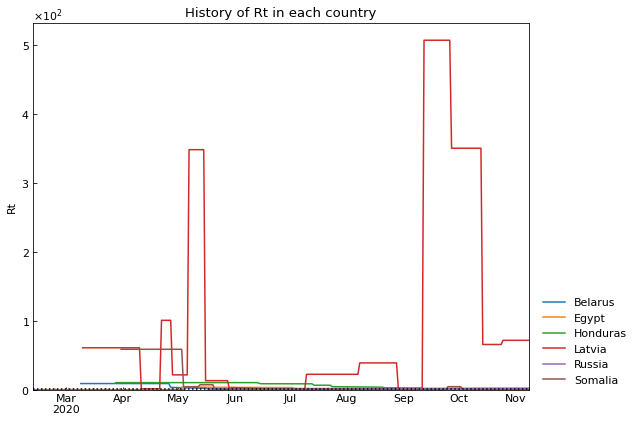

Country,Belarus,Egypt,Honduras,Latvia,Russia,Somalia
Date,,,,,,
2020-11-04,2.05,1.78,1.09,71.54,1.29,0.0
2020-11-05,2.05,1.78,1.09,71.54,1.29,0.0
2020-11-06,2.05,1.78,1.09,71.54,1.29,0.0
2020-11-07,2.05,1.78,1.09,71.54,1.29,0.0
2020-11-08,2.05,1.78,1.09,71.54,1.29,0.0


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

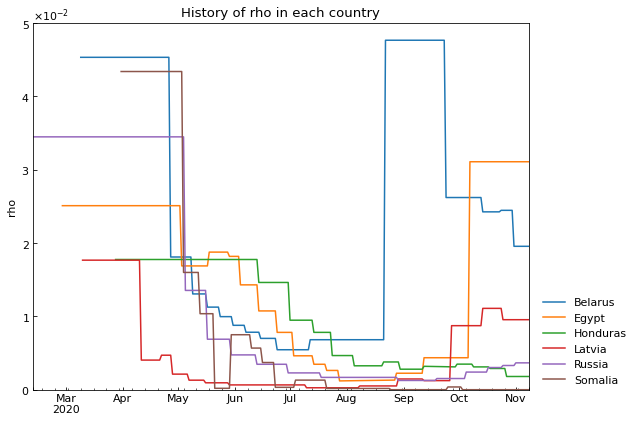

Country,Belarus,Egypt,Honduras,Latvia,Russia,Somalia
Date,,,,,,
2020-11-04,0.019555,0.031087,0.001801,0.009547,0.003661,0.0
2020-11-05,0.019555,0.031087,0.001801,0.009547,0.003661,0.0
2020-11-06,0.019555,0.031087,0.001801,0.009547,0.003661,0.0
2020-11-07,0.019555,0.031087,0.001801,0.009547,0.003661,0.0
2020-11-08,0.019555,0.031087,0.001801,0.009547,0.003661,0.0


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

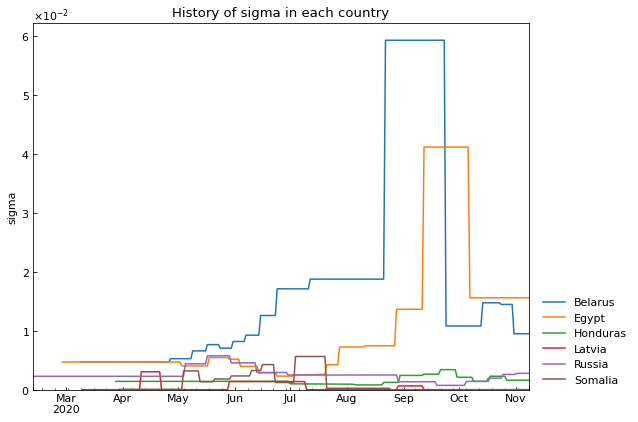

Country,Belarus,Egypt,Honduras,Latvia,Russia,Somalia
Date,,,,,,
2020-11-04,0.009472,0.015569,0.00161,0.0,0.002775,0.0
2020-11-05,0.009472,0.015569,0.00161,0.0,0.002775,0.0
2020-11-06,0.009472,0.015569,0.00161,0.0,0.002775,0.0
2020-11-07,0.009472,0.015569,0.00161,0.0,0.002775,0.0
2020-11-08,0.009472,0.015569,0.00161,0.0,0.002775,0.0


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

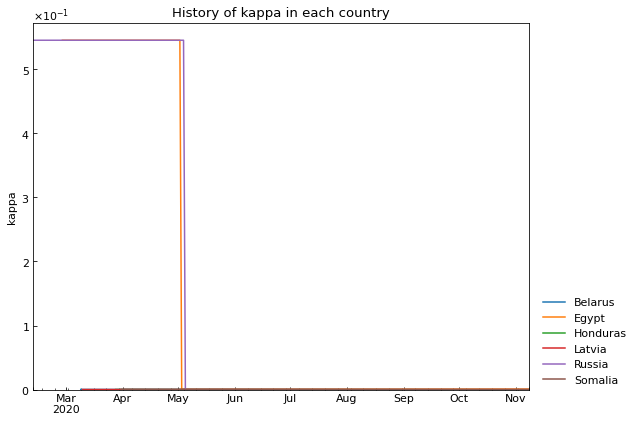

Country,Belarus,Egypt,Honduras,Latvia,Russia,Somalia
Date,,,,,,
2020-11-04,0.00006,0.001029,0.000002,0.000133,0.000057,0.000153
2020-11-05,0.00006,0.001029,0.000002,0.000133,0.000057,0.000153
2020-11-06,0.00006,0.001029,0.000002,0.000133,0.000057,0.000153
2020-11-07,0.00006,0.001029,0.000002,0.000133,0.000057,0.000153
2020-11-08,0.00006,0.001029,0.000002,0.000133,0.000057,0.000153


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

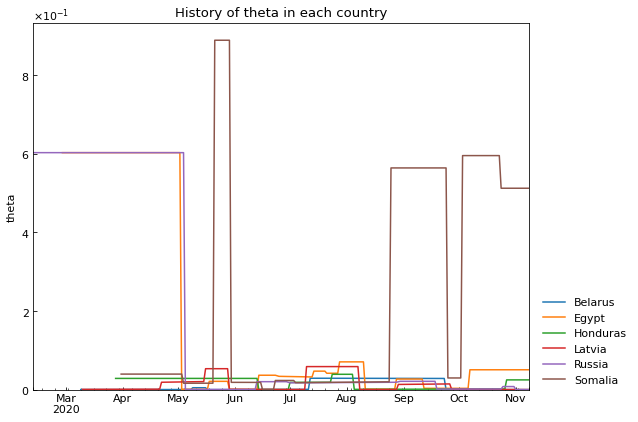

Country,Belarus,Egypt,Honduras,Latvia,Russia,Somalia
Date,,,,,,
2020-11-04,0.000161,0.050673,0.024958,0.000297,0.000169,0.512286
2020-11-05,0.000161,0.050673,0.024958,0.000297,0.000169,0.512286
2020-11-06,0.000161,0.050673,0.024958,0.000297,0.000169,0.512286
2020-11-07,0.000161,0.050673,0.024958,0.000297,0.000169,0.512286
2020-11-08,0.000161,0.050673,0.024958,0.000297,0.000169,0.512286


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53451 entries, 0 to 53520
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 53451 non-null  datetime64[ns]
 1   Country                              53451 non-null  object        
 2   Rt                                   53451 non-null  float64       
 3   theta                                53451 non-null  float64       
 4   kappa                                53451 non-null  float64       
 5   rho                                  53451 non-null  float64       
 6   sigma                                53451 non-null  float64       
 7   School_closing                       53451 non-null  int64         
 8   Workplace_closing                    53451 non-null  int64         
 9   Cancel_events                        53451 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.178049,-0.173353,-0.121228,-0.272278,-0.303462,-0.184702,-0.195463,-0.193365,0.266199,-0.225299,-0.046367,-0.136526,0.087931,0.022625,-0.125392,-0.226369
theta,-0.178049,1.000000,0.990451,0.867612,0.123910,-0.219490,-0.245460,-0.168544,-0.274138,-0.510156,-0.107515,0.021095,0.225884,-0.473615,-0.235179,-0.108762,0.047875
kappa,-0.173353,0.990451,1.000000,0.891201,0.136676,-0.219270,-0.242011,-0.156596,-0.268629,-0.514419,-0.102782,-0.000180,0.234925,-0.481946,-0.238320,-0.111493,0.046576
rho,-0.121228,0.867612,0.891201,1.000000,0.185753,-0.320427,-0.358528,-0.132823,-0.247599,-0.555326,-0.176420,0.027803,0.254797,-0.534376,-0.402874,-0.325126,0.016590
sigma,-0.272278,0.123910,0.136676,0.185753,1.000000,0.179649,0.158196,0.234906,0.141905,-0.390915,0.234680,0.168925,0.220575,-0.083141,0.152945,0.197796,0.238217
School_closing,-0.303462,-0.219490,-0.219270,-0.320427,0.179649,1.000000,0.945184,0.833193,0.789031,-0.056822,0.904239,0.039849,0.420984,0.697508,0.496606,0.623143,0.752338
Workplace_closing,-0.184702,-0.245460,-0.242011,-0.358528,0.158196,0.945184,1.000000,0.813621,0.795479,-0.008258,0.902399,-0.016907,0.370193,0.721810,0.571324,0.676984,0.720732
Cancel_events,-0.195463,-0.168544,-0.156596,-0.132823,0.234906,0.833193,0.813621,1.000000,0.768583,-0.112988,0.828407,0.072212,0.625288,0.638255,0.262808,0.381166,0.783065
Gatherings_restrictions,-0.193365,-0.274138,-0.268629,-0.247599,0.141905,0.789031,0.795479,0.768583,1.000000,-0.051641,0.778203,0.008914,0.510864,0.560798,0.258079,0.287710,0.664516
Transport_closing,0.266199,-0.510156,-0.514419,-0.555326,-0.390915,-0.056822,-0.008258,-0.112988,-0.051641,1.000000,-0.159712,0.157772,-0.360388,0.385274,0.040494,0.025317,-0.258220


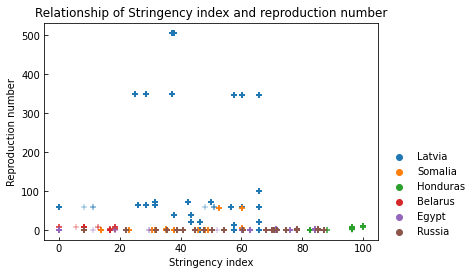

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()